<a href="https://colab.research.google.com/github/setyawan1234/PCVK_GENAP_2023/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 
from google.colab.patches import cv2_imshow

[[0 1 0]
 [1 1 1]
 [0 1 0]]


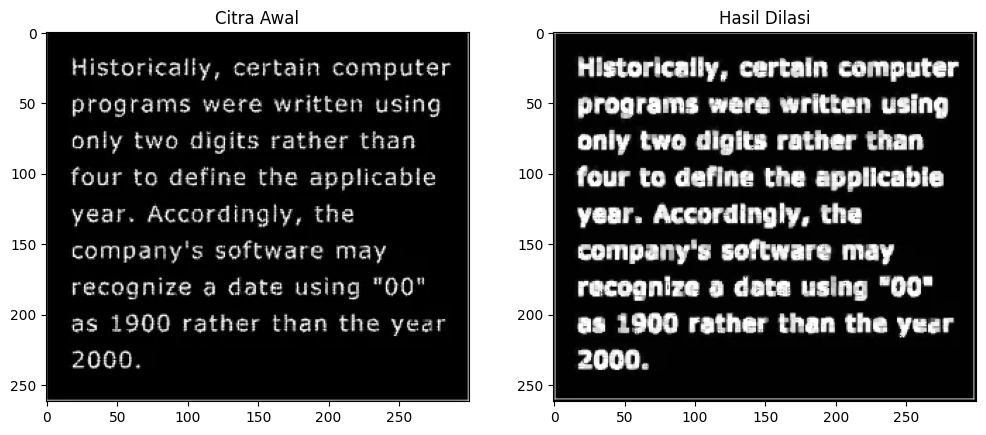

In [13]:
# 3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV

# Membaca gambar input
img = cv2.imread('/content/drive/MyDrive/PCVK/week9/morphology.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SED) berbentuk cross 3 x 3
kernel = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)

# Membuat gambar kosong untuk menampung hasil dilasi
dilated_img = np.zeros_like(img)

# Mendapatkan ukuran gambar input
height, width = img.shape

# Looping untuk melakukan operasi dilasi
for i in range(1, height-1):
    for j in range(1, width-1):
        # Melakukan dilasi pada setiap piksel pada gambar input
        dilated_pixel = np.max(img[i-1:i+2, j-1:j+2] + kernel)
        dilated_img[i, j] = dilated_pixel

print(kernel)

# Menampilkan gambar hasil dilasi
fig, axs = plt.subplots(1, 2, figsize=(5, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(dilated_img, cmap='gray')
axs[1].set_title('Hasil Dilasi')
plt.show()

[[0 1 0]
 [1 1 1]
 [0 1 0]]


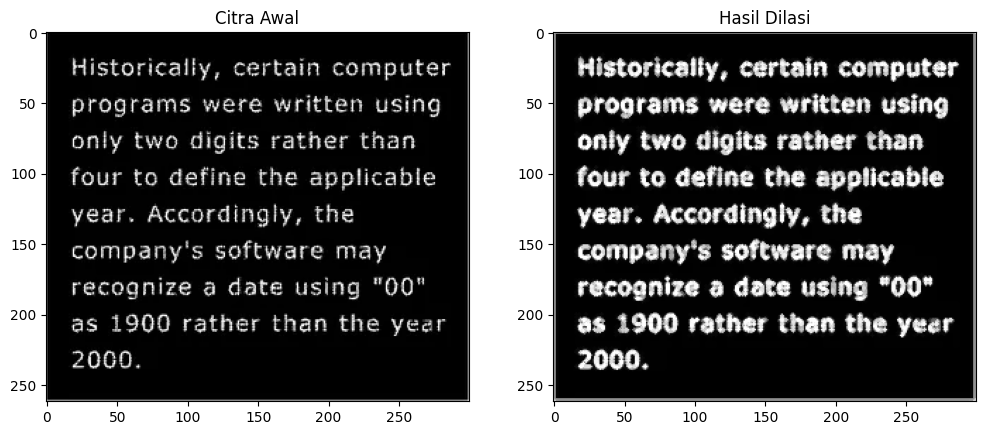

In [14]:
# 4. implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV

kernel = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)

dilation = cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel) #morphologyEX berfungsi untuk menghilangkan noise, 

print(kernel)

# Menampilkan gambar hasil dilasi
fig, axs = plt.subplots(1, 2, figsize=(5, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(dilation, cmap='gray')
axs[1].set_title('Hasil Dilasi')
plt.show()

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


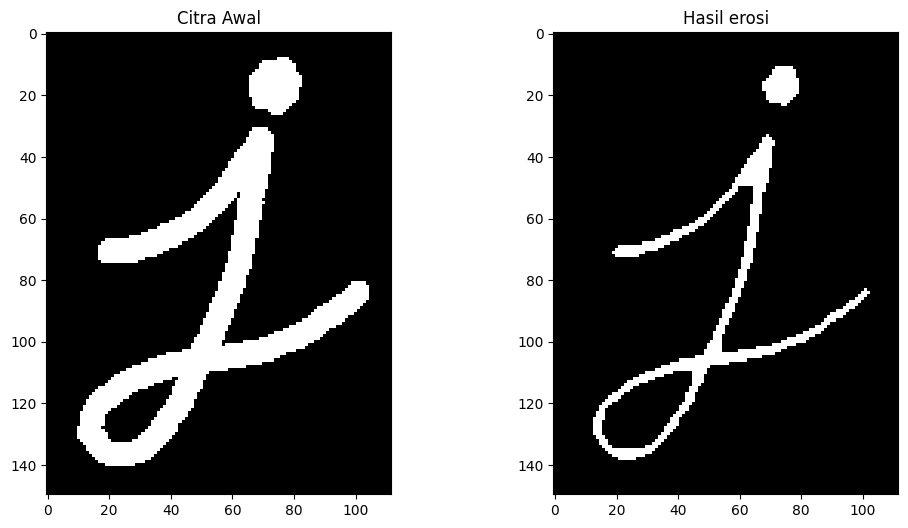

In [16]:
# 5.Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV

img2 = cv2.imread('/content/drive/MyDrive/PCVK/week9/j.png', cv2.IMREAD_GRAYSCALE)

se = np.ones((5, 5), dtype=np.uint8)

# Membuat gambar kosong untuk menampung hasil erosi
eroded_img = np.zeros_like(img2)

# Mendapatkan ukuran gambar input
height, width = img2.shape

# Looping untuk melakukan operasi erosi
for i in range(2, height-2):
    for j in range(2, width-2):
        # Melakukan erosi pada setiap piksel pada gambar input
        eroded_pixel = np.min(img2[i-2:i+3, j-2:j+3] * se)
        eroded_img[i, j] = eroded_pixel

print(se)

# Menampilkan gambar hasil erosi
fig, axs = plt.subplots(1, 2, figsize=(5, 5))
axs[0].imshow(img2, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(eroded_img, cmap='gray')
axs[1].set_title('Hasil erosi')
plt.show()

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


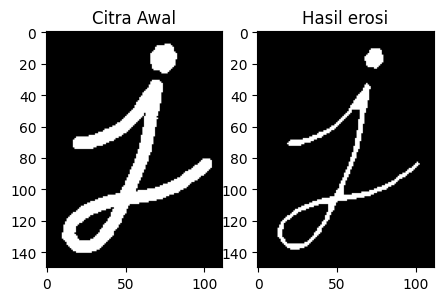

In [20]:
# 6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV

erode = cv2.morphologyEx(img2, cv2.MORPH_ERODE, se) #morphologyEX berfungsi untuk menghilangkan noise, 

print(se)

# Menampilkan gambar hasil erosi
fig, axs = plt.subplots(1, 2, figsize=(5, 5))
axs[0].imshow(img2, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(erode, cmap='gray')
axs[1].set_title('Hasil erosi')
plt.show()

* tanpa menggunakan library

<ipython-input-23-2d072ef9e508>:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

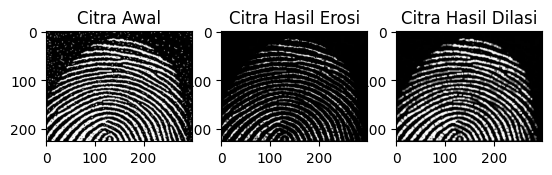

In [23]:
# 7. Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

# Membaca image untuk operasi erosi
img7 = cv2.imread('/content/drive/MyDrive/PCVK/week9/fingerprint.png', 0)

#Memperoleh ukuran gambar
width, height = img7.shape

#Tampilkan gambar
plt.imshow(img7, cmap="gray")

# Tentukan elemen penataan
# k= 11,15,45 -Ukuran yang berbeda dari elemen penataan
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Tentukan gambar baru
imgErode = np.zeros((width,height), dtype=np.uint8)

#Erosi tanpa menggunakan fungsi cv2 bawaan untuk morfologi
for i in range(constant, width-constant): #constant adalah tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,height-constant):
    temp = img7[i-constant:i+constant+1, j-constant:j+constant+1] #temp digunakan untuk menampung atau menyimpan data untuk sementara
    product = temp * SE
    imgErode[i,j] = np.min(product)

#Baca gambar untuk pelebaran
img7_2 = imgErode

#Memperoleh ukuran gambar
width2, height2= img7_2.shape

#Tampilkan gambar
plt.imshow(img7_2, cmap="gray")

#Tentukan gambar baru untuk menyimpan piksel gambar yang diperbesar
imgDilate = np.zeros((width2,height2), dtype=np.uint8)

#Tentukan elemen penataan 
SED = np.ones((k,k), dtype=np.uint8)
constant1 = (k-1)//2

#Operasi dilatasi tanpa menggunakan fungsi cv2 bawaan
for i in range(constant1, width2-constant1):
  for j in range(constant1,height2-constant1):
    temp = img7_2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

plt.subplot(131),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')
plt.subplot(133),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')

* menggunakan library

(<Axes: title={'center': 'Citra\xa0Hasil\xa0Opening'}>,
 Text(0.5, 1.0, 'Citra\xa0Hasil\xa0Opening'))

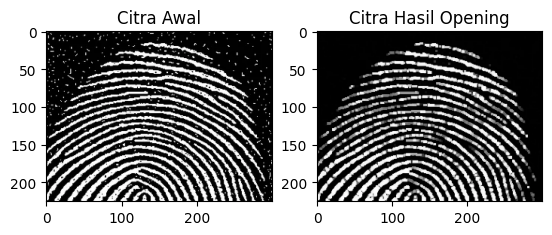

In [7]:
img7 = cv2.imread('/content/drive/MyDrive/PCVK/week9/fingerprint.png')
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(img7, cv2.MORPH_OPEN, kernel)

plt.subplot(121), plt.imshow(img7), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(opening), plt.title('Citra Hasil Opening')

* tanpa menggunakan library 

<ipython-input-10-8c99e23b46f1>:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img6, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Closing'}>,
 Text(0.5, 1.0, 'Citra Hasil Closing'))

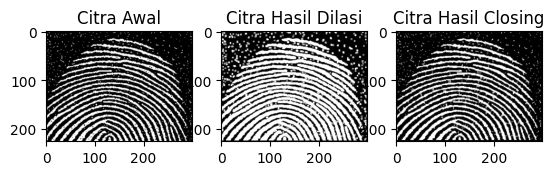

In [10]:
# 8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

# Membaca image untuk operasi erosi
img6 = cv2.imread('/content/drive/MyDrive/PCVK/week9/fingerprint.png', 0)

#Acquire size of the image
m, n= img6.shape

#Show the image
plt.imshow(img6, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((m,n), dtype=np.uint8)

#Define the structuring element 
SED = np.ones((k,k), dtype=np.uint8)
constant1 = (k-1)//2

#Dilation operation without using inbuilt cv2 function
for i in range(constant1, m-constant1):
  for j in range(constant1,n-constant1):
    temp = img6[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

#Read the image for dilation
img6_2 = imgDilate

#Acquire size of the image
m, n = img6_2.shape

#Show the image
plt.imshow(img6_2, cmap="gray")

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant): #constant adalah tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = img6_2[i-constant:i+constant+1, j-constant:j+constant+1] #temp digunakan untuk menampung atau menyimpan data untuk sementara
    product = temp * SE
    imgErode[i,j] = np.min(product)

plt.subplot(131),plt.imshow(img6, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')
plt.subplot(133),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Closing')# Membaca image untuk operasi erosi

* menggunakan library

(<Axes: title={'center': 'Citra\xa0Hasil\xa0Closing'}>,
 Text(0.5, 1.0, 'Citra\xa0Hasil\xa0Closing'))

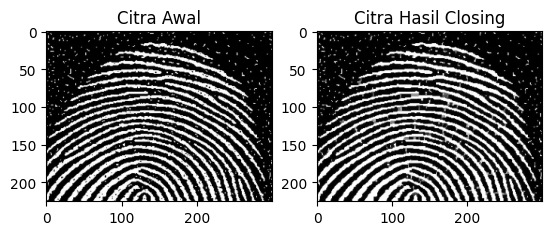

In [12]:
img6 = cv2.imread('/content/drive/MyDrive/PCVK/week9/fingerprint.png')
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(img6, cv2.MORPH_CLOSE, kernel)

plt.subplot(121), plt.imshow(img6), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(closing), plt.title('Citra Hasil Closing')

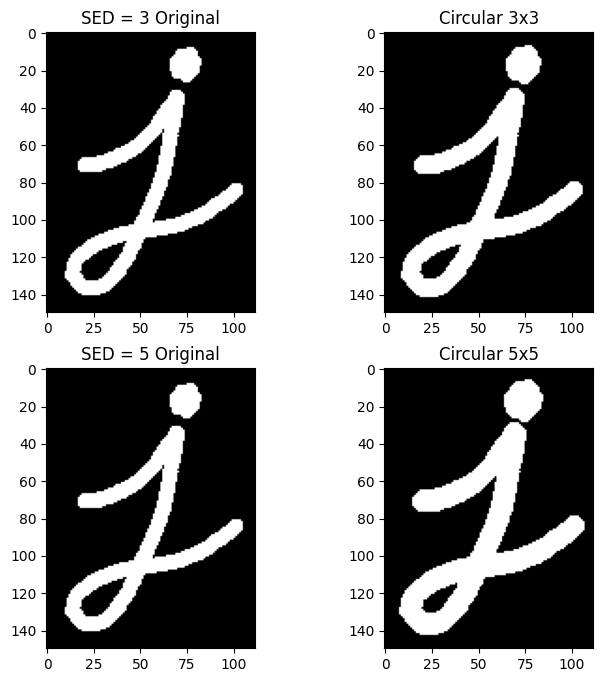

In [6]:
# 10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5

# Load image
img7 = cv2.imread('/content/drive/MyDrive/PCVK/week9/j.png')

# Define structuring element circular 3x3 and 5x5
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
kernel5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

# Dilate image with circular 3x3 kernel
dilation3 = cv2.dilate(img7, kernel3, iterations=1)

# Dilate image with circular 5x5 kernel
dilation5 = cv2.dilate(img7, kernel5, iterations=1)

# Show original image and dilated images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img7, cmap='gray')
axs[0, 0].set_title('SED = 3 Original')
axs[0, 1].imshow(dilation3, cmap='gray')
axs[0, 1].set_title('Circular 3x3')
axs[1, 0].imshow(img7, cmap='gray')
axs[1, 0].set_title('SED = 5 Original')
axs[1, 1].imshow(dilation5, cmap='gray')
axs[1, 1].set_title('Circular 5x5')
plt.show()

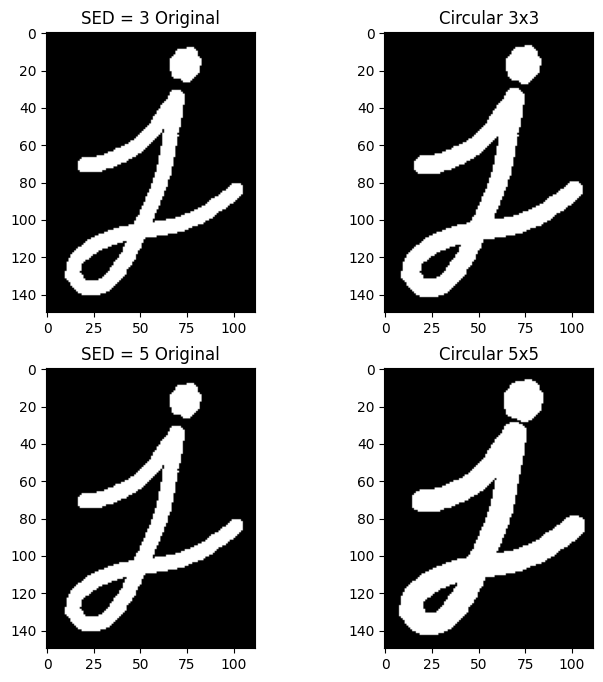

In [5]:
# 10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5

# Load image
img7 = cv2.imread('/content/drive/MyDrive/PCVK/week9/j.png')

# Define structuring element circular 3x3 and 5x5
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
kernel5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

# Dilate image with circular 3x3 kernel
dilation3 = cv2.dilate(img7, kernel3, iterations=1)

# Dilate image with circular 5x5 kernel
dilation5 = cv2.dilate(img7, kernel5, iterations=1)

# Show original image and dilated images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img7, cmap='gray')
axs[0, 0].set_title('SED = 3 Original')
axs[0, 1].imshow(dilation3, cmap='gray')
axs[0, 1].set_title('Circular 3x3')
axs[1, 0].imshow(img7, cmap='gray')
axs[1, 0].set_title('SED = 5 Original')
axs[1, 1].imshow(dilation5, cmap='gray')
axs[1, 1].set_title('Circular 5x5')
plt.show()

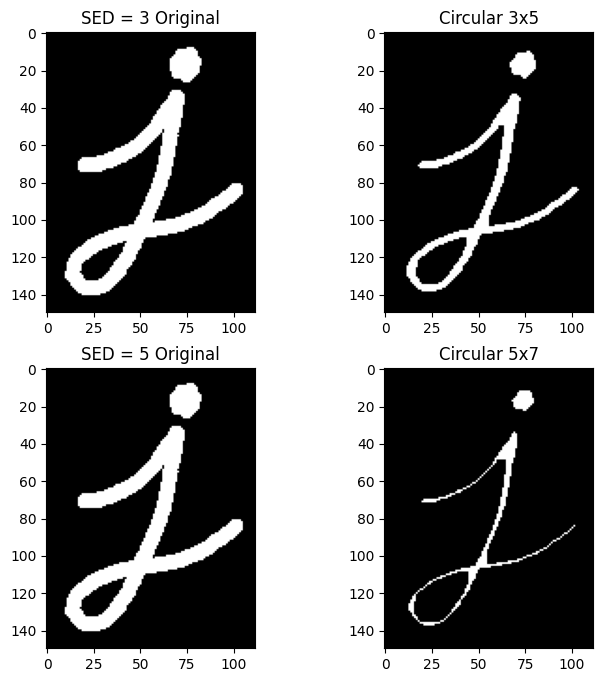

In [12]:
# 11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7

# Load image
img8 = cv2.imread('/content/drive/MyDrive/PCVK/week9/j.png')

# Define structuring element circular 3x3 and 5x5
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,5)) 
kernel5 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,7)) 

# Dilate image with circular 3x3 kernel
erosion3 = cv2.erode(img8, kernel3, iterations = 1)

# Dilate image with circular 5x5 kernel
erosion5 = cv2.erode(img8, kernel5, iterations = 1)

# Show original image and dilated images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img8, cmap='gray')
axs[0, 0].set_title('SED = 3 Original')
axs[0, 1].imshow(erosion3, cmap='gray')
axs[0, 1].set_title('Circular 3x5')
axs[1, 0].imshow(img8, cmap='gray')
axs[1, 0].set_title('SED = 5 Original')
axs[1, 1].imshow(erosion5, cmap='gray')
axs[1, 1].set_title('Circular 5x7')
plt.show()

SE = Line Vertikal 3


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

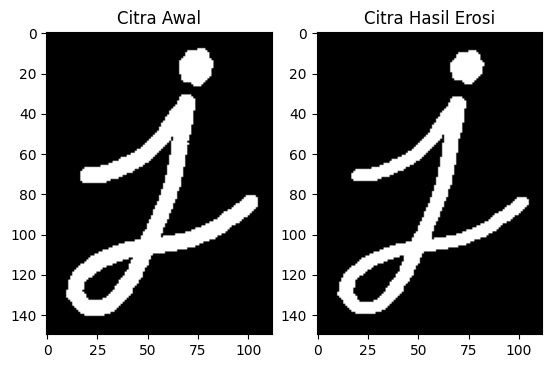

In [21]:
# 12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5

img4 = cv2.imread('/content/drive/MyDrive/PCVK/week9/j.png')

kernel = np.ones((3,1),np.uint8) 
erosion = cv2.morphologyEx(img4, cv2.MORPH_ERODE, kernel)

print("SE = Line Vertikal 3")

plt.subplot(121), plt.imshow(img4, cmap="gray"), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')

SE = Line Vertikal 5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

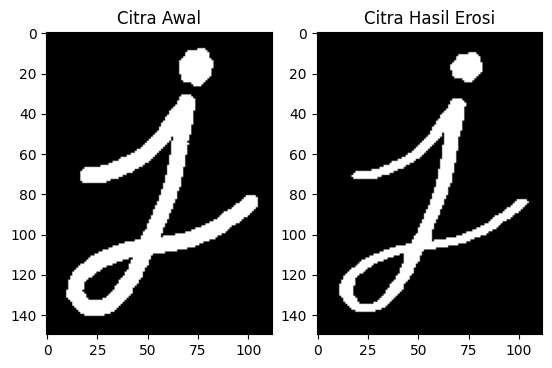

In [22]:
kernel = np.ones((5,1),np.uint8) 
erosion = cv2.morphologyEx(img4, cv2.MORPH_ERODE, kernel)

print("SE = Line Vertikal 5")

plt.subplot(121), plt.imshow(img4, cmap="gray"), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')